In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import os
import time
%matplotlib notebook

In [2]:
min_distance = 0.6
dot_size = 50
dispersion = 6
DOT_ABS_MAX = 9
chart_abs_max = 10

In [3]:
def distance_between_points(a, b):
    x_dist = a[0] - b[0]
    y_dist = a[1] - b[1]
    return math.sqrt((x_dist ** 2) + (y_dist ** 2))

def overlaps(a, b):
    return distance_between_points(a, b) < min_distance

def overlaps_any(proposed_dot, dots):
    for dot in dots:
        if overlaps(dot, proposed_dot):
            return True
    return False

def outside_range(dot):
    return max(abs(dot[0]), abs(dot[1])) > DOT_ABS_MAX

In [4]:
def generate_dots(dots_wanted):
    dots = []
    while len(dots) < dots_wanted:
        proposed_dot = [np.random.normal(0) * math.log(len(dots) + 1, dispersion) for i in range(2)]
        if overlaps_any(proposed_dot, dots) or outside_range(proposed_dot):
            continue
        else:
            dots.append(proposed_dot)
    return dots

In [5]:
def generate_dots_df(dots_wanted):
    return pd.DataFrame(generate_dots(dots_wanted), columns = ['x', 'y'])

In [76]:
def draw_dots(dots_wanted):
    ax = sns.scatterplot(
        x='x',
        y='y',
        data=generate_dots_df(dots_wanted),
        s=dot_size
    )
    return ax

0

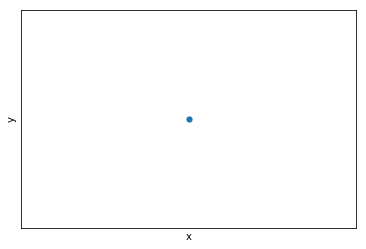

In [108]:
num_dots = np.random.randint(17) + 1
ax = draw_dots(num_dots)
ax.set_xlim(-chart_abs_max, chart_abs_max)
ax.set_ylim(-chart_abs_max, chart_abs_max)
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
os.system("spd-say -r -30 -t child_male -y english '{}'".format(num_dots))
